# Knowledge, Attitude, and Practices toward febrile Seizures

### Abstract

Febrile seizures are epilepsy that target children who have a temperature of 100.4 F (i.e., 38 in Celsius) or above. The seizures usually still for few minutes after that stops from itself.

The fever can continue a lot. This study analyzed 827 family in Saudi Arabia including other nationality living in Saudi Arabia with Febrile seizures happened to the children at least one time to assess the awareness of the family about how to deal or know how much its harm.

In this study we analyzed the data 40 clinical and paraclinical attributes. We checked the accuracy and quality of data by removing invalid record or values. We use Data mining methods and went through many steps (Data preparing, data definition, data exploration modeling and evaluation). To our study this is good way to study in Febrile seizures in Saudi Arabia. 


This situation happens among kids between 6 months and 5 years old. The outcomes of this research are to assist families in bringing self-awareness on Febrile seizures and taking necessary step for their children.

### Target Questions:
In this post, I'm tackling the below questions: -

* who are the participants?
* Having thermometer at home?
* Can friable seizure lead to brain damage?
* May Febrile seizures result in death?
* Do Traditional medicines have benefit?

### Data Understanding

Data understanding is the first step you need to think about when you have data set, to know our data set:
- is our data structured or unstructured?
- is there any missing or noisy data?


It helps to improve the quality of data and prepare.
my questions for understanding the data set focus on:
- The size of data set.
- quantitative or qualitative data set.
- The missing values

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from collections import defaultdict
%matplotlib inline

df = pd.read_csv('./febrile_seizures.csv')
df.head()

,Gender,Social Status,Age,Education level,Working in health,Where are you living,child had convulsions,Temperature cause convulsions,Spasm is a type of epilepsy,Is it dangerous up to 5 years,...,Child with cramps should be placed on his left or right side,necessary to observe the apparent child characteristics,Child should be taken to the doctor immediately,Put anything inside child mouth prevent child from biting his teeth with force,Child must be resuscitated by introducing air through mouth,Secretions should be withdrawn,Heart must be refreshed,Dealing with a child when has a cramp,having thermometer at home,Know how to use thermometer
0,male,Single,20 - 25,college,Health,Eastern,No,Yes,No,Yes,...,Dont Know,Yes,No,No,No,Yes,No,Yes,Yes,Yes
1,Female,Single,20 - 25,college,nonH,Eastern,No,Yes,Dont Know,Yes,...,Dont Know,Yes,Dont Know,Dont Know,Dont Know,Dont Know,Dont Know,Dont Know,No,Yes
2,male,Married,26 - 40,college,nonH,Eastern,No,Yes,No,Yes,...,Dont Know,Yes,No,Dont Know,No,No,No,Dont Know,Yes,Yes
3,Female,Married,40 - 60,college,nonH,Eastern,No,Yes,No,Yes,...,Dont Know,Yes,No,Yes,Yes,Yes,Dont Know,No,Yes,Yes
4,Female,Married,40 - 60,college,Health,Eastern,No,Yes,Yes,Yes,...,Dont Know,Yes,No,Yes,Dont Know,Dont Know,Dont Know,Dont Know,Yes,Yes


## Data Preparation

It helps to improve the quality of data and prepare, data cleaning first we try to solve problem of corrupted data by filling loosed data manually , normally most of data bases have a problem with missing values so we solved this problem in order to improve data quality.

We breakt int feild to check everthing is okay

In [3]:
#Show the numbers of users depend on working in health

health = df['Working in health'].value_counts().reset_index()
health.head()

,index,Working in health
0,nonH,750
1,Health,77


In [11]:
# number of users by province

province = df['Where are you living '].value_counts().reset_index()
province.head()

,index,Where are you living
0,Eastern,523
1,middle,194
2,West,63
3,south,27
4,north,16


In [ ]:
#Change index to appropriate name = method

province.rename(columns={'index': 'method', 'Where are you living': 'count'}, inplace=True)
province.head()

### Modeling and results :

After the Data Preparation process, as part of our supervised learning we did two classification for our data .By using linear regression.
We classify the data according:

1. The people who working and not working in the health industry.
2. Education level.

### 1. who are the participants?

* #### Depaend on Social Status 

In [4]:
# We are intersted to participants and their info

# The number of Participants depend on Social Status , 703 are married  , 124 not married

married_df = df[df['Social Status'] == 'Married']
single_df = df[df['Social Status'] == 'Single']
single_df.shape

(124, 37)

In [7]:
# The number of Participants depend on Social Status 

df['Social Status'].value_counts()

Married    703
Single     124
Name: Social Status, dtype: int64

In [6]:
# We are intersted to participants and their info

# The number of Participants depend on Social Status , 703 are married  , 124 not married

married_df = df[df['Social Status'] == 'Married']
single_df = df[df['Social Status'] == 'Single']
single_df.shape

(124, 37)

In [11]:
# The number of Participants depend on Gender , 165 are male  , 662 are female

male_df = df[df['Gender'] == 'male']
female_df = df[df['Gender'] == 'Female']
female_df.shape

(662, 37)

In [8]:
# The number of Participants depend on Gender 

df['Gender'].value_counts()

Female    662
male      165
Name: Gender, dtype: int64

In [9]:
# The percentage of number of Participants depend on Gender 

df['Gender'].value_counts()/df['Gender'].shape

Female    0.800484
male      0.199516
Name: Gender, dtype: float64

In [12]:
# Males and their education Level 

male_df['Education level'].value_counts()

college    102
phd         40
high        23
Name: Education level, dtype: int64

In [13]:
# males and their education Level 

male_df['Education level'].value_counts()/(male_df.shape[0] - sum(male_df['Education level'].isnull()))

college    0.618182
phd        0.242424
high       0.139394
Name: Education level, dtype: float64

In [14]:
# females and their education Level 

female_df['Education level'].value_counts()# females and their education Level 

female_df['Education level'].value_counts()/(female_df.shape[0] - sum(female_df['Education level'].isnull()))

college    0.679758
high       0.194864
phd        0.096677
Less       0.028701
Name: Education level, dtype: float64

* ####  Depend on Education Level

In [15]:
# We are intersted here in Education level

# College Level = 552
# High level = 152
# Phd Level = 104
# less = 19

college_df = df[df['Education level'] == 'college']
high_df = df[df['Education level'] == 'high']
phd_df = df[df['Education level'] == 'phd']
less_df = df[df['Education level'] == 'Less']
high_df.shape

(152, 37)

In [16]:
# # The percentage of number of Participants depend on Education level 

df['Education level'].value_counts()/df['Education level'].shape

college    0.667473
high       0.183797
phd        0.125756
Less       0.022975
Name: Education level, dtype: float64

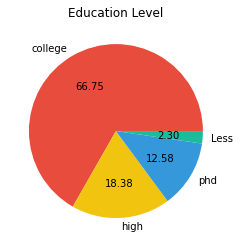

In [17]:
# Pie charts Education level of participants

# College Level = 552
# High level = 152
# Phd Level = 104
# less = 19

college = df.loc[df['Education level'] == 'college'].count()[0]
high = df.loc[df['Education level'] == 'high'].count()[0]
phd = df.loc[df['Education level'] == 'phd'].count()[0]
less = df.loc[df['Education level'] == 'Less'].count()[0]
labels = ['college', 'high', 'phd' , 'Less']
colors = ['#E74C3C','#F1C40F','#3498DB', '#1ABC9C']

plt.pie([college , high , phd , less] , labels=labels , colors=colors , autopct = '%.2f')

plt.title("Education Level")
plt.show()

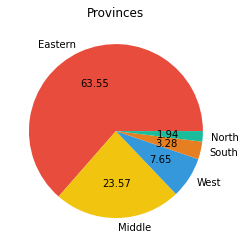

In [18]:
# Pie charts of participants living

e = df.loc[df['Where are you living'] == 'Eastern'].count()[0]
m = df.loc[df['Where are you living'] == 'middle'].count()[0]
w = df.loc[df['Where are you living'] == 'West'].count()[0]
s = df.loc[df['Where are you living'] == 'south'].count()[0]
n = df.loc[df['Where are you living'] == 'north'].count()[0]
labels = ['Eastern', 'Middle', 'West' , 'South', 'North']
colors = ['#E74C3C','#F1C40F','#3498DB','#E67E22','#1ABC9C']

plt.pie([e , m , w , s , n] , labels=labels , colors=colors , autopct = '%.2f')

plt.title("Provinces")
plt.show()

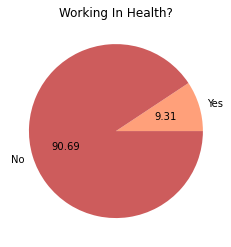

In [19]:
# Pie chart of Participants working in health, 77 working in health , 750 not working in health

yes =df.loc[df['Working in health'] == 'Health'].count()[0]
no = df.loc[df['Working in health'] == 'nonH'].count()[0]
labels = ['Yes', 'No']
colors = ['#FFA07A','#CD5C5C']

plt.pie([yes , no] , labels=labels , colors=colors , autopct = '%.2f')

plt.title("Working In Health?")
plt.show()




### 2. Has one of your family children ever had convulsions?

Fever attacks are seizures or spasm that occur for children caused by fever. The highest risk of febrile seizures occurred to children aged between 6 months to 5 years.

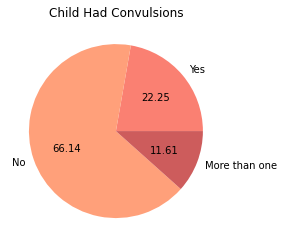

In [20]:
# Pie chart of 'child had convulsions question (ALl Participants)   


yes = df.loc[df['child had convulsions'] == 'Yes'].count()[0]
no = df.loc[df['child had convulsions'] == 'No'].count()[0]
more = df.loc[df['child had convulsions'] == 'More than one'].count()[0]
labels = ['Yes', 'No', 'More than one']
colors = ['#FA8072','#FFA07A','#CD5C5C']

plt.pie([yes , no , more] , labels=labels , colors=colors , autopct = '%.2f')

plt.title("Child Had Convulsions")
plt.show()

###  3. Having thermometer at home?

Results leads to discovering both groups do not have enough awareness about the importance of thermometer at home and how it can help to detect and observe child temperature to protect children from friable seizure.

In [21]:
# We are intersted in persons working in Health

# The number of Participants working in health, 77 working in health , 750 not working in health

health_df = df[df['Working in health'] == 'Health']
not_health_df = df[df['Working in health'] == 'nonH']
not_health_df.shape

(750, 37)

In [22]:
# The percentage of answers for 'having thermometer at home question (Working in health participants) 


health_df['having thermometer at home'].value_counts()/(health_df.shape[0] - sum(health_df['having thermometer at home'].isnull()))

Yes    0.857143
No     0.142857
Name: having thermometer at home, dtype: float64

In [24]:
# The percentage of answers for 'having thermometer at home question (Regular  participants) 

not_health_df['having thermometer at home'].value_counts()/(not_health_df.shape[0] - sum(not_health_df['having thermometer at home'].isnull()))

Yes    0.834667
No     0.165333
Name: having thermometer at home, dtype: float64

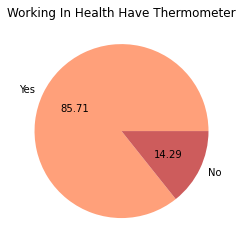

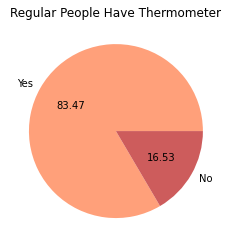

In [23]:
# Pie Chart having thermometer at home question (working in health Participants) 


yes = health_df.loc[health_df['having thermometer at home'] == 'Yes'].count()[0]
no = health_df.loc[health_df['having thermometer at home'] == 'No'].count()[0]
labels = ['Yes', 'No']
colors = ['#FFA07A','#CD5C5C']

plt.pie([yes , no] , labels=labels , colors=colors , autopct = '%.2f')

plt.title("Working In Health Have Thermometer")
plt.show()


# Pie Chart having thermometer at home question (Regular Participants) 

yes = not_health_df.loc[not_health_df['having thermometer at home'] == 'Yes'].count()[0]
no = not_health_df.loc[not_health_df['having thermometer at home'] == 'No'].count()[0]
labels = ['Yes', 'No']
colors = ['#FFA07A','#CD5C5C']

plt.pie([yes , no] , labels=labels , colors=colors , autopct = '%.2f')

plt.title("Regular People Have Thermometer")
plt.show()

### 4. Can friable seizure lead to brain damage?
 
In fact according to long-standing and large of body experimental and clinical data some type of seizure lead to neuronal death in the brain.

In [27]:
# The answers of brain damge question (working in health Participants) 

health_df['is it lead to brain damage'].value_counts()/(health_df.shape[0] - sum(health_df['is it lead to brain damage'].isnull()))

Yes          0.701299
Dont Know    0.220779
No           0.077922
Name: is it lead to brain damage, dtype: float64

In [29]:
 # The percentage of answers for brain damge question (Regular Participants) 



not_health_df['is it lead to brain damage'].value_counts()/(not_health_df.shape[0] - sum(not_health_df['is it lead to brain damage'].isnull()))

Yes          0.717333
Dont Know    0.253333
No           0.029333
Name: is it lead to brain damage, dtype: float64

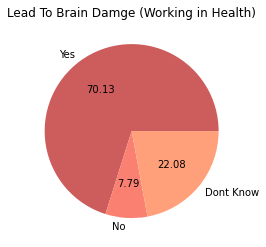

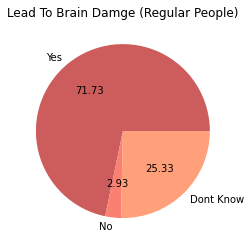

In [30]:
# Pie chart of brain damge question (Working in Health Participants)   

yes = health_df.loc[health_df['is it lead to brain damage'] == 'Yes'].count()[0]
no = health_df.loc[health_df['is it lead to brain damage'] == 'No'].count()[0]
dont = health_df.loc[health_df['is it lead to brain damage'] == 'Dont Know'].count()[0]
labels = ['Yes', 'No', 'Dont Know']
colors = ['#CD5C5C','#FA8072','#FFA07A',]

plt.pie([yes , no , dont] , labels=labels , colors=colors , autopct = '%.2f')

plt.title("Lead To Brain Damge (Working in Health)")
plt.show()


# Pie Chart brain damge question (Regular Participants) 

yes = not_health_df.loc[not_health_df['is it lead to brain damage'] == 'Yes'].count()[0]
no = not_health_df.loc[not_health_df['is it lead to brain damage'] == 'No'].count()[0]
dont = not_health_df.loc[not_health_df['is it lead to brain damage'] == 'Dont Know'].count()[0]
labels = ['Yes', 'No', 'Dont Know']
colors = ['#CD5C5C','#FA8072','#FFA07A',]

plt.pie([yes , no , dont] , labels=labels , colors=colors , autopct = '%.2f')

plt.title("Lead To Brain Damge (Regular People)")
plt.show()




### 5. May Febrile seizures result in death?

There is one case for a child with febrile seizure who suddenly and unexpectedly died after a suspicious seizure at night while in bed during the beginning of sleep phases. She was revived but they announced her to be brain dead 2 days later at the medical center. 

After necropsy of the child, they found multi-organs effected because of hypo-perfusion and did not found injury, disease, or toxins cause of death. Therewith a seizure not seen, they have assumed it is the likely cause of death based on the examination of the medical examiner and forensic (author Marcus Nashelsky), the clinical results of post-resuscitation, and various aspects of the clinical background.



* The outcomes depend on Edcuation Level: 

In [31]:
# The number of answers for is it lead to death question (Depend on College level of participants) 

college_df['is it lead to death'].value_counts()

Dont Know    283
Yes          233
No            36
Name: is it lead to death, dtype: int64

In [32]:
# The percentage of answers for is it lead to death question (Depend on College level of participants) 

college_df['is it lead to death'].value_counts()/(college_df.shape[0] - sum(college_df['is it lead to death'].isnull()))

Dont Know    0.512681
Yes          0.422101
No           0.065217
Name: is it lead to death, dtype: float64

In [33]:
# The number of answers for is it lead to death question (Depend on High level of participants) 

high_df['is it lead to death'].value_counts()

Dont Know    86
Yes          49
No           17
Name: is it lead to death, dtype: int64

In [34]:
# The percentage of answers for is it lead to death question (Depend on High level of participants) 

high_df['is it lead to death'].value_counts()/(high_df.shape[0] - sum(high_df['is it lead to death'].isnull()))

Dont Know    0.565789
Yes          0.322368
No           0.111842
Name: is it lead to death, dtype: float64

In [35]:
# The number of answers for is it lead to death question (Depend on Phd level of participants) 

phd_df['is it lead to death'].value_counts()

Dont Know    49
Yes          46
No            9
Name: is it lead to death, dtype: int64

In [36]:
# The percentage of answers for is it lead to death question (Depend on Phd level of participants) 

phd_df['is it lead to death'].value_counts()/(phd_df.shape[0] - sum(phd_df['is it lead to death'].isnull()))

Dont Know    0.471154
Yes          0.442308
No           0.086538
Name: is it lead to death, dtype: float64

In [37]:
# The number of answers for is it lead to death question (Depend on less level of participants) 

less_df['is it lead to death'].value_counts()

Dont Know    11
Yes           6
No            2
Name: is it lead to death, dtype: int64

In [38]:
# The percentage of answers for is it lead to death question (Depend on less level of participants) 

less_df['is it lead to death'].value_counts()/(less_df.shape[0] - sum(less_df['is it lead to death'].isnull()))

Dont Know    0.578947
Yes          0.315789
No           0.105263
Name: is it lead to death, dtype: float64

### 6. Do Traditional medicines have benefit?

The results show that most of the people working in health do not know if traditional medicines have benefits. 

However, according to Avicenna (ibn Sina) who has many recommendations, suggestions, and traditional medicines in his book like Chives, Savory, Wormwood, and Dill.


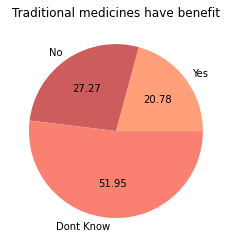

In [39]:
# Pie chart of Traditional medicines have benefit question (Working in Health Participants)   


yes = health_df.loc[health_df['Traditional medicines have benefit'] == 'Yes'].count()[0]
no = health_df.loc[health_df['Traditional medicines have benefit'] == 'No'].count()[0]
dont = health_df.loc[health_df['Traditional medicines have benefit'] == 'Dont Know'].count()[0]
labels = ['Yes', 'No', 'Dont Know']
colors = ['#FFA07A','#CD5C5C','#FA8072']

plt.pie([yes , no , dont] , labels=labels , colors=colors , autopct = '%.2f')

plt.title("Traditional medicines have benefit")
plt.show()